In [185]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime,timedelta
from keras.models import Sequential
from keras.layers import LSTM, Dense

ERROR! Session/line number was not unique in database. History logging moved to new session 122


In [4]:
data = pd.read_csv(r'C:\Users\Kanishk\Desktop\Power ML\file_02.csv')

In [5]:
data = data.drop('index', axis=1)
data['Date'] = pd.to_datetime(data['Date'])

# Filling the missing values with mean

In [6]:
for column in ['Nuclear Generation Actual (in MU)', 'Nuclear Generation Estimated (in MU)']:
    data[column] = data[column].fillna(data[column].mean())

# Replacing commas with blanks

In [7]:
for column in ['Thermal Generation Actual (in MU)', 'Thermal Generation Estimated (in MU)']:
    data[column] = data[column].apply(lambda x: np.float(x.replace(',', '')))

In [8]:
data

,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
0,2017-09-01,Northern,624.23,484.21,30.360000,35.570000,273.27,320.81
1,2017-09-01,Western,1106.89,1024.33,25.170000,3.810000,72.00,21.53
2,2017-09-01,Southern,576.66,578.55,62.730000,49.800000,111.57,64.78
3,2017-09-01,Eastern,441.02,429.39,37.242208,36.987877,85.94,69.36
4,2017-09-01,NorthEastern,29.11,15.91,37.242208,36.987877,24.64,21.21
...,...,...,...,...,...,...,...,...
4940,2020-08-01,Northern,669.47,602.96,26.880000,23.410000,348.72,351.98
4941,2020-08-01,Western,1116.00,1262.10,42.370000,36.630000,54.67,20.28
4942,2020-08-01,Southern,494.66,415.53,61.830000,26.280000,93.49,77.25
4943,2020-08-01,Eastern,482.86,547.03,37.242208,36.987877,87.22,93.78


# Stripping only Northern region rows

In [9]:
data_0=data.iloc[::5].copy()

In [10]:
pd.set_option('display.max_rows', None)
Data_0=data_0.drop(columns=['Thermal Generation Estimated (in MU)', 'Nuclear Generation Actual (in MU)','Nuclear Generation Estimated (in MU)','Hydro Generation Actual (in MU)','Hydro Generation Estimated (in MU)']).copy()
Data_0

,Date,Region,Thermal Generation Actual (in MU)
0,2017-09-01,Northern,624.23
5,2017-09-02,Northern,624.23
10,2017-09-03,Northern,624.23
15,2017-09-04,Northern,624.23
20,2017-09-05,Northern,628.58
25,2017-09-06,Northern,628.58
30,2017-09-07,Northern,628.48
35,2017-09-08,Northern,628.48
40,2017-09-09,Northern,631.16
45,2017-09-10,Northern,620.05


In [11]:
Data_0.dtypes

Date                                 datetime64[ns]
Region                                       object
Thermal Generation Actual (in MU)           float64
dtype: object

<AxesSubplot:xlabel='Date', ylabel='Thermal Generation Actual (in MU)'>

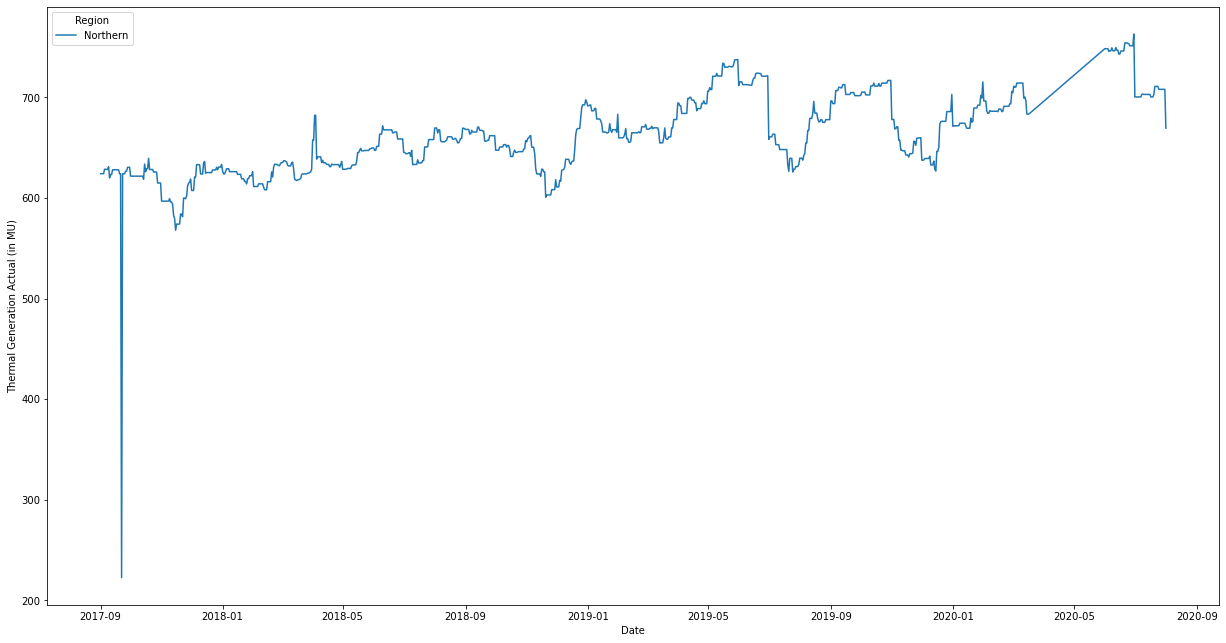

In [12]:
plt.figure(figsize=(21,11))
sd.lineplot(x='Date',y='Thermal Generation Actual (in MU)',hue='Region',data=Data_0)

In [14]:
class DeepModelTS():
    """
    A class to create a deep time series model
    """
    def __init__(
        self, 
        data: pd.DataFrame, 
        Y_var: str,
        lag: int,
        LSTM_layer_depth: int, 
        epochs=10, 
        batch_size=256,
        train_test_split=0
    ):

        self.data = data 
        self.Y_var = Y_var 
        self.lag = lag 
        self.LSTM_layer_depth = LSTM_layer_depth
        self.batch_size = batch_size
        self.epochs = epochs
        self.train_test_split = train_test_split

    @staticmethod
    def create_X_Y(ts: list, lag: int) -> tuple:
        """
        A method to create X and Y matrix from a time series list for the training of 
        deep learning models 
        """
        X, Y = [], []

        if len(ts) - lag <= 0:
            X.append(ts)
        else:
            for i in range(len(ts) - lag):
                Y.append(ts[i + lag])
                X.append(ts[i:(i + lag)])

        X, Y = np.array(X), np.array(Y)

        # Reshaping the X array to an LSTM input shape 
        X = np.reshape(X, (X.shape[0], X.shape[1], 1))

        return X, Y         

    def create_data_for_NN(
        self,
        use_last_n=None
        ):
        """
        A method to create data for the neural network model
        """
        # Extracting the main variable we want to model/forecast
        y = self.data[self.Y_var].tolist()

        # Subseting the time series if needed
        if use_last_n is not None:
            y = y[-use_last_n:]

        # The X matrix will hold the lags of Y 
        X, Y = self.create_X_Y(y, self.lag)

        # Creating training and test sets 
        X_train = X
        X_test = []

        Y_train = Y
        Y_test = []

        if self.train_test_split > 0:
            index = round(len(X) * self.train_test_split)
            X_train = X[:(len(X) - index)]
            X_test = X[-index:]     
            
            Y_train = Y[:(len(X) - index)]
            Y_test = Y[-index:]

        return X_train, X_test, Y_train, Y_test

    def LSTModel(self):
        """
        A method to fit the LSTM model 
        """
        # Getting the data 
        X_train, X_test, Y_train, Y_test = self.create_data_for_NN()

        # Defining the model
        model = Sequential()
        model.add(LSTM(self.LSTM_layer_depth, activation='relu', input_shape=(self.lag, 1)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')

        # Defining the model parameter dict 
        keras_dict = {
            'x': X_train,
            'y': Y_train,
            'batch_size': self.batch_size,
            'epochs': self.epochs,
            'shuffle': False
        }

        if self.train_test_split > 0:
            keras_dict.update({
                'validation_data': (X_test, Y_test)
            })

        # Fitting the model 
        model.fit(
            **keras_dict
        )

        # Saving the model to the class 
        self.model = model

        return model

    def predict(self) -> list:
        """
        A method to predict using the test data used in creating the class
        """
        yhat = []

        if(self.train_test_split > 0):
        
            # Getting the last n time series 
            _, X_test, _, _ = self.create_data_for_NN()        

            # Making the prediction list 
            yhat = [y[0] for y in self.model.predict(X_test)]

        return yhat

    def predict_n_ahead(self, n_ahead: int):
        """
        A method to predict n time steps ahead
        """    
        X, _, _, _ = self.create_data_for_NN(use_last_n=self.lag)        

        # Making the prediction list 
        yhat = []

        for _ in range(n_ahead):
            # Making the prediction
            fc = self.model.predict(X)
            yhat.append(fc)

            # Creating a new input matrix for forecasting
            X = np.append(X, fc)

            # Ommiting the first variable
            X = np.delete(X, 0)

            # Reshaping for the next iteration
            X = np.reshape(X, (1, len(X), 1))

        return yhat   

In [272]:
deep_learner = DeepModelTS(
data = Data_0,
Y_var = 'Thermal Generation Actual (in MU)',
lag = 8,
LSTM_layer_depth = 100,
epochs = 15,
batch_size = 20,
train_test_split = 0.92
)


In [273]:
model = deep_learner.LSTModel()

Train on 78 samples, validate on 903 samples
Epoch 1/15
78/78 [==============================] - 1s 7ms/step - loss: 273502.9844 - val_loss: 284267.1572
Epoch 2/15
78/78 [==============================] - 0s 3ms/step - loss: 259766.2748 - val_loss: 207267.6853
Epoch 3/15
78/78 [==============================] - 0s 2ms/step - loss: 163906.9099 - val_loss: 164022.0370
Epoch 4/15
78/78 [==============================] - 0s 2ms/step - loss: 118788.4044 - val_loss: 88002.0676
Epoch 5/15
78/78 [==============================] - 0s 2ms/step - loss: 51661.2487 - val_loss: 1037.3121
Epoch 6/15
78/78 [==============================] - 0s 2ms/step - loss: 6070.6005 - val_loss: 487.0878
Epoch 7/15
78/78 [==============================] - 0s 2ms/step - loss: 6184.8784 - val_loss: 458.0541
Epoch 8/15
78/78 [==============================] - 0s 2ms/step - loss: 3248.3321 - val_loss: 2761.0679
Epoch 9/15
78/78 [==============================] - 0s 2ms/step - loss: 4606.1258 - val_loss: 704.4776
Epoch 

In [276]:
lag_model = 8
ts = Data_0['Thermal Generation Actual (in MU)'].tail(lag_model).values.tolist()
X, _ = deep_learner.create_X_Y(ts, lag=lag_model)
yhat = model.predict(X)

ERROR! Session/line number was not unique in database. History logging moved to new session 133


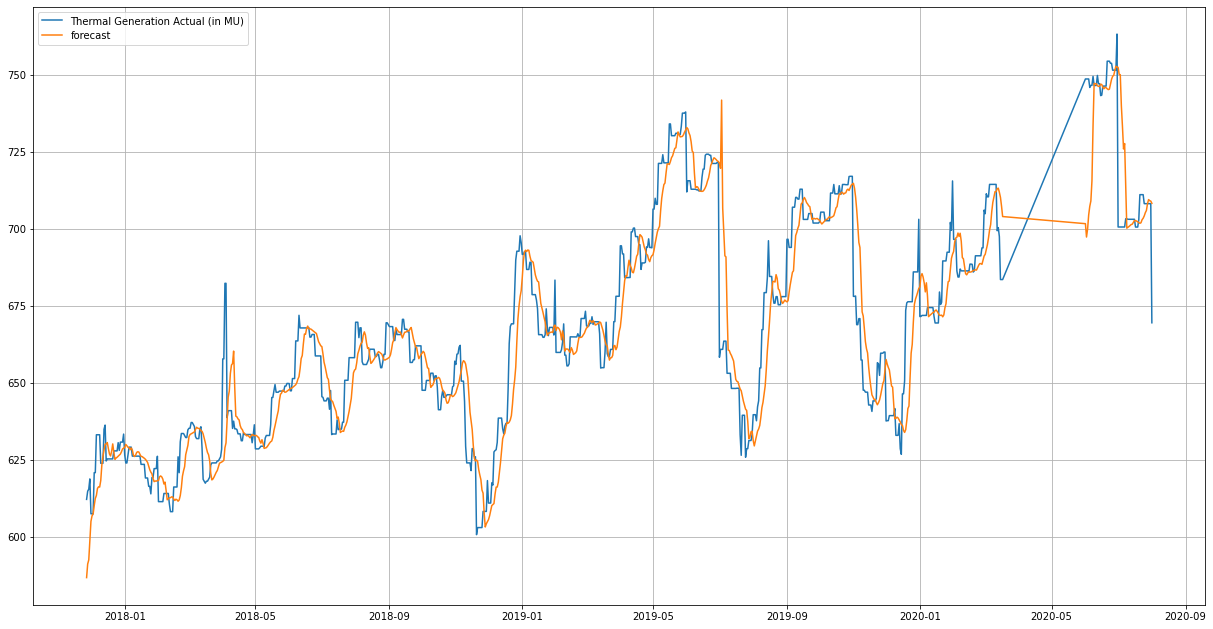

In [277]:
yhat = deep_learner.predict()
# Constructing the forecast dataframe
fc = Data_0.tail(len(yhat)).copy()
fc.reset_index(inplace=True)
fc['forecast'] = yhat
# Ploting the forecasts
plt.figure(figsize=(21, 11))
for dtype in ['Thermal Generation Actual (in MU)', 'forecast']:
  plt.plot(
    'Date',
    dtype,
    data=fc,
    label=dtype,
  )
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Creating the model using full data and forecasting n steps aheaddeep_learner = DeepModelTS(
aheaddeep_learner = DeepModelTS(
data=Data_0,
Y_var='Thermal Generation Actual (in MU)',
lag=8,
LSTM_layer_depth=2,
epochs=15,
train_test_split=0
)
# Fitting the model
deep_learner.LSTModel()
# Forecasting n steps ahead
n_ahead = 250
yhat = deep_learner.predict_n_ahead(n_ahead)
yhat = [y[0][0] for y in yhat]

ERROR! Session/line number was not unique in database. History logging moved to new session 138
Train on 78 samples, validate on 903 samples
Epoch 1/15
78/78 [==============================] - 1s 7ms/step - loss: 333265.9756 - val_loss: 341630.5580
Epoch 2/15
78/78 [==============================] - 0s 2ms/step - loss: 261358.9167 - val_loss: 280354.0528
Epoch 3/15
78/78 [==============================] - 0s 2ms/step - loss: 226949.7480 - val_loss: 239912.8985
Epoch 4/15
78/78 [==============================] - 0s 2ms/step - loss: 193718.4623 - val_loss: 195009.4654
Epoch 5/15
78/78 [==============================] - 0s 2ms/step - loss: 152542.2654 - val_loss: 129058.2680
Epoch 6/15
78/78 [==============================] - 0s 2ms/step - loss: 92760.8145 - val_loss: 74264.2258
Epoch 7/15
78/78 [==============================] - 0s 2ms/step - loss: 74271.4774 - val_loss: 35319.5741
Epoch 8/15
78/78 [==============================] - 0s 2ms/step - loss: 34565.8193 - val_loss: 19148.4734
E

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Kanishk\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-278-fea9be926761>", line 14, in <module>
    yhat = deep_learner.predict_n_ahead(n_ahead)
  File "<ipython-input-14-4d50780374cd>", line 151, in predict_n_ahead
    X = np.delete(X, 0)
  File "<__array_function__ internals>", line 6, in delete
  File "C:\Users\Kanishk\anaconda3\envs\tensorflow\lib\site-packages\numpy\lib\function_base.py", line 4379, in delete
    "size %i" % (obj, axis, N))
IndexError: index 0 is out of bounds for axis 0 with size 0

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Kanishk\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2045, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'IndexError' obj

In [ ]:
fc = Data_0.tail(450).copy() 
fc['type'] = 'original'

last_date = max(fc['Date'])
hat_frame = pd.DataFrame({
    'Date': [last_date + timedelta(days=x + 1) for x in range(n_ahead)], 
    'Thermal Generation Actual (in MU)': yhat,
    'type': 'forecast'
})

fc = fc.append(hat_frame)
fc.reset_index(inplace=True, drop=True)

# Ploting the forecasts 
plt.figure(figsize=(21, 11))
for col_type in ['original', 'forecast']:
    plt.plot(
        'Date', 
        'Thermal Generation Actual (in MU)', 
        data=fc[fc['type']==col_type],
        label=col_type
        )

plt.legend()
plt.grid()
plt.show()  

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Kanishk\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-278-2cde0daf1efd>", line 8, in <module>
    'type': 'forecast'
  File "C:\Users\Kanishk\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py", line 468, in __init__
    mgr = init_dict(data, index, columns, dtype=dtype)
  File "C:\Users\Kanishk\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\internals\construction.py", line 283, in init_dict
    return arrays_to_mgr(arrays, data_names, index, columns, dtype=dtype)
  File "C:\Users\Kanishk\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\internals\construction.py", line 78, in arrays_to_mgr
    index = extract_index(arrays)
  File "C:\Users\Kanishk\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\internals\construction.py", line 397, in extract_index
    raise ValueErr

Traceback (most recent call last):
  File "C:\Users\Kanishk\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-278-2cde0daf1efd>", line 8, in <module>
    'type': 'forecast'
  File "C:\Users\Kanishk\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py", line 468, in __init__
    mgr = init_dict(data, index, columns, dtype=dtype)
  File "C:\Users\Kanishk\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\internals\construction.py", line 283, in init_dict
    return arrays_to_mgr(arrays, data_names, index, columns, dtype=dtype)
  File "C:\Users\Kanishk\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\internals\construction.py", line 78, in arrays_to_mgr
    index = extract_index(arrays)
  File "C:\Users\Kanishk\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\internals\construction.py", line 397, in extract_index
    raise ValueErr